In [146]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle
import statsmodels
from pandas.plotting import autocorrelation_plot
%matplotlib inline
from pandas import read_csv
from pandas import datetime
from pandas import Series


WARNING - (py.warnings._showwarnmsg) - C:\Users\Magic\AppData\Local\Temp\ipykernel_11888\2858714743.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime



### India weather data

In [148]:
raw_dataset = pd.read_csv("C:\\Users\\Magic\\Documents\\data analyst dataset\\India's weather data.csv", encoding= 'unicode_escape')
raw_dataset

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2015-01-01 00:00:00,24,11,0.0,8.7,5,71,02:39 PM,03:24 AM,07:14 AM,...,22,15,51,0.0,1017,11,10,22,10,India
1,2015-01-01 01:00:00,24,11,0.0,8.7,5,71,02:39 PM,03:24 AM,07:14 AM,...,18,15,51,0.0,1016,11,10,16,9,India
2,2015-01-01 02:00:00,24,11,0.0,8.7,5,71,02:39 PM,03:24 AM,07:14 AM,...,15,15,51,0.0,1016,11,10,11,8,India
3,2015-01-01 03:00:00,24,11,0.0,8.7,5,71,02:39 PM,03:24 AM,07:14 AM,...,11,15,50,0.0,1016,11,10,5,6,India
4,2015-01-01 04:00:00,24,11,0.0,8.7,5,71,02:39 PM,03:24 AM,07:14 AM,...,12,13,48,0.0,1017,12,10,3,7,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65587,2022-06-25 19:00:00,47,34,0.0,14.0,10,25,02:31 AM,04:14 PM,05:25 AM,...,6,0,9,0.0,994,44,10,257,5,India
65588,2022-06-25 20:00:00,47,34,0.0,14.0,10,25,02:31 AM,04:14 PM,05:25 AM,...,8,0,9,0.0,995,43,10,266,5,India
65589,2022-06-25 21:00:00,47,34,0.0,14.0,10,25,02:31 AM,04:14 PM,05:25 AM,...,9,0,10,0.0,995,41,10,275,6,India
65590,2022-06-25 22:00:00,47,34,0.0,14.0,10,25,02:31 AM,04:14 PM,05:25 AM,...,12,1,11,0.0,995,40,10,293,7,India


### Everthing looks valuable information for now I will remove all column except date_time, tempC
### Using machine learning make 30 days future prediction
### Visualize with powerBI

In [175]:
dataset_with_Index = raw_dataset.drop(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'WindGustKmph', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'], axis=1)
dataset_with_Index_L = raw_dataset.drop(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'WindGustKmph', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'], axis=1)
dataset= raw_dataset.drop(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'WindGustKmph', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'], axis=1)
dataset

,date_time,tempC
0,2015-01-01 00:00:00,11
1,2015-01-01 01:00:00,11
2,2015-01-01 02:00:00,11
3,2015-01-01 03:00:00,11
4,2015-01-01 04:00:00,12
...,...,...
65587,2022-06-25 19:00:00,44
65588,2022-06-25 20:00:00,43
65589,2022-06-25 21:00:00,41
65590,2022-06-25 22:00:00,40


In [150]:
dataset.set_index(['date_time'], inplace = True)

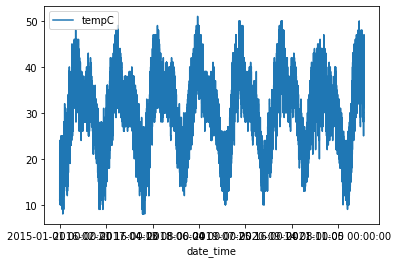

In [151]:

dataset.plot()
pyplot.show()

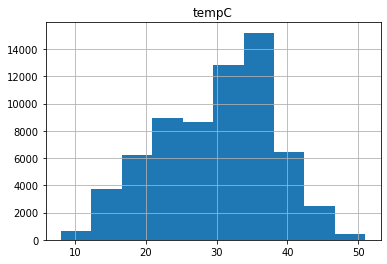

In [152]:
dataset.hist()
pyplot.show()

### From visual inspection is confusing looks like some seasonal effect on data.
### Lets check data is stationary or not from Augmented Dickey-Fuller test.
### Iam reffering this blog for information https://machinelearningmastery.com/time-series-data-stationary-python/

In [153]:

from statsmodels.tsa.stattools import adfuller
X = dataset.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.522586
p-value: 0.000002
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### p-value > 0.05: Fail to reject the null hypothesis and data is non-stationary.
### p-value <= 0.05: Reject the null hypothesis and data is stationary.
### Data is stationary. 

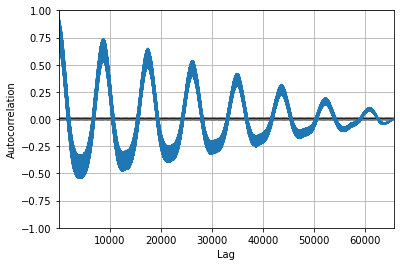

In [154]:

autocorrelation_plot(dataset)
pyplot.show()

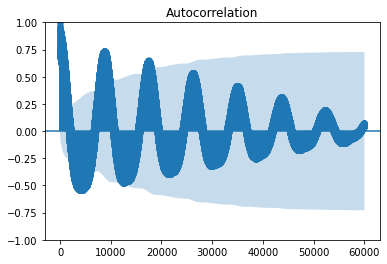

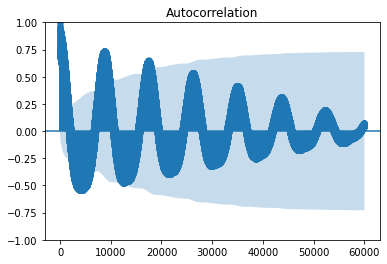

In [155]:
statsmodels.graphics.tsaplots.plot_acf(dataset, lags = 60000)

### Augmented Dickey-Fuller test showed data is stationary but plot saying dataset is non-stationary, it's not making any sense maybe I should read complete concept about augmented Dickey-Fuller test for now I will difference it plot once again. 

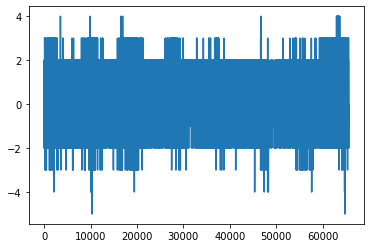

In [156]:

 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
X = dataset.values
diff = difference(X)
pyplot.plot(diff)
pyplot.show()

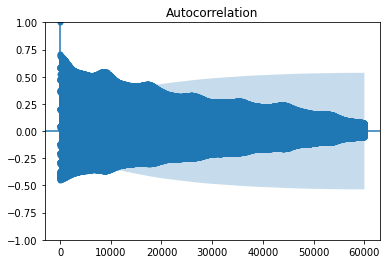

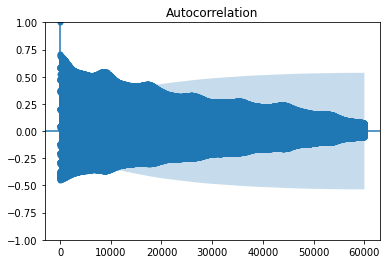

In [157]:
statsmodels.graphics.tsaplots.plot_acf(diff, lags = 60000)

### I am running low on time, I tried lots of ways to make auto_correlation graph look stationary but nothing worked for now I go with dickey-fuller test result.
### Next step is modelling while I doing research I stumbled similer project https://www.youtube.com/watch?v=mgX0Iz4q0bE in this he not tried to make dataset stationary don't know why and used neaural-prophet.
### I was planning to use ARIMA-model since I don't acf value, lets use neaural-prophet and follow similar steps and find what sort of result I get.

In [173]:
dataset_with_Index

,date_time,tempC
0,2015-01-01 00:00:00,11
1,2015-01-01 01:00:00,11
2,2015-01-01 02:00:00,11
3,2015-01-01 03:00:00,11
4,2015-01-01 04:00:00,12
...,...,...
65587,2022-06-25 19:00:00,44
65588,2022-06-25 20:00:00,43
65589,2022-06-25 21:00:00,41
65590,2022-06-25 22:00:00,40


In [159]:
dataset_with_Index.rename(columns = {'date_time':'ds', 'tempC':'y'}, inplace = True)
dataset_with_Index

,ds,y
0,2015-01-01 00:00:00,11
1,2015-01-01 01:00:00,11
2,2015-01-01 02:00:00,11
3,2015-01-01 03:00:00,11
4,2015-01-01 04:00:00,12
...,...,...
65587,2022-06-25 19:00:00,44
65588,2022-06-25 20:00:00,43
65589,2022-06-25 21:00:00,41
65590,2022-06-25 22:00:00,40


In [160]:
model = NeuralProphet()
model.fit(dataset_with_Index, freq='H')

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 64


  0%|          | 0/170 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.80E-01, min: 1.04E-01


  0%|          | 0/170 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.80E-01, min: 1.04E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.23E-01
Epoch[64/64]: 100%|██████████████| 64/64 [03:59<00:00,  3.74s/it, SmoothL1Loss=0.00375, MAE=2.28, RMSE=2.93, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.183782,14.392865,17.939084,0.0
1,0.006947,3.037483,3.948722,0.0
2,0.004728,2.591322,3.289984,0.0
3,0.005523,2.797286,3.548308,0.0
4,0.006979,3.154583,3.982061,0.0
...,...,...,...,...
59,0.004230,2.434252,3.109967,0.0
60,0.004052,2.370279,3.044280,0.0
61,0.003909,2.328737,2.988961,0.0
62,0.003806,2.297734,2.950917,0.0


## Forecasting 24Hr

In [161]:
future = model.make_future_dataframe(dataset_with_Index, periods=24)
forecast = model.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - C:\Users\Magic\anaconda3\envs\work\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2022-06-26 00:00:00,None,34.520447,NaN,28.895704,8.105202,-0.063570,-2.416893
1,2022-06-26 01:00:00,None,33.919914,NaN,28.895531,8.098974,-0.054586,-3.020006
2,2022-06-26 02:00:00,None,33.440323,NaN,28.895361,8.092737,-0.045366,-3.502408
3,2022-06-26 03:00:00,None,33.315033,NaN,28.895185,8.086491,-0.035990,-3.630652
4,2022-06-26 04:00:00,None,33.392609,NaN,28.895016,8.080236,-0.026540,-3.556105
5,2022-06-26 05:00:00,None,33.557365,NaN,28.894846,8.073972,-0.017099,-3.394350
6,2022-06-26 06:00:00,None,34.072937,NaN,28.894672,8.067699,-0.007750,-2.881683
7,2022-06-26 07:00:00,None,35.132492,NaN,28.894501,8.061417,0.001424,-1.824849
8,2022-06-26 08:00:00,None,36.458580,NaN,28.894327,8.055127,0.010343,-0.501215
9,2022-06-26 09:00:00,None,37.709335,NaN,28.894157,8.048827,0.018926,0.747425


In [162]:
foecast_data= forecast.drop(['y', 'residual1', 'trend', 'season_yearly', 'season_weekly', 'season_daily'], axis=1)
foecast_data

,ds,yhat1
0,2022-06-26 00:00:00,34.520447
1,2022-06-26 01:00:00,33.919914
2,2022-06-26 02:00:00,33.440323
3,2022-06-26 03:00:00,33.315033
4,2022-06-26 04:00:00,33.392609
5,2022-06-26 05:00:00,33.557365
6,2022-06-26 06:00:00,34.072937
7,2022-06-26 07:00:00,35.132492
8,2022-06-26 08:00:00,36.458580
9,2022-06-26 09:00:00,37.709335


In [163]:
foecast_data.set_index(['ds'], inplace = True)
dataset_with_Index.set_index(['ds'], inplace = True)

<AxesSubplot:xlabel='ds'>

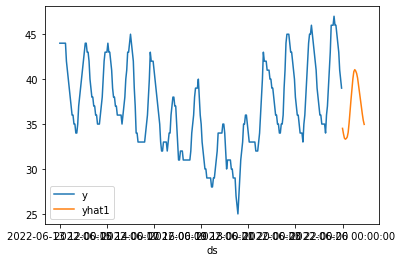

In [164]:
b =dataset_with_Index.tail(1000)
a =foecast_data*b


frames = [dataset_with_Index.tail(300), foecast_data]

result = pd.concat(frames)
result.plot()

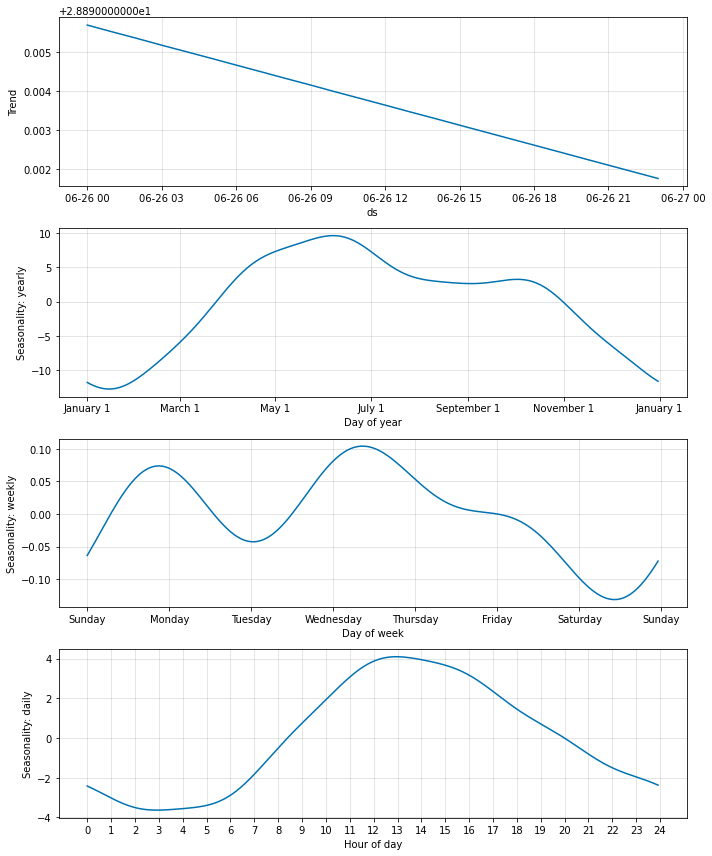

In [165]:
plt2 = model.plot_components(forecast)


## Save Model

In [166]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(model, f)

## Load Model

In [167]:
with open('saved_model.pkl', "rb") as f:
    model = pickle.load(f)

In [176]:
dataset_with_Index_L.rename(columns = {'date_time':'ds', 'tempC':'y'}, inplace = True)

In [177]:
future = model.make_future_dataframe(dataset_with_Index_L, periods=24)
forecast = model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - C:\Users\Magic\anaconda3\envs\work\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2022-06-26 00:00:00,None,34.520447,NaN,28.895704,8.105202,-0.063570,-2.416893
1,2022-06-26 01:00:00,None,33.919914,NaN,28.895531,8.098974,-0.054586,-3.020006
2,2022-06-26 02:00:00,None,33.440323,NaN,28.895361,8.092737,-0.045366,-3.502408
3,2022-06-26 03:00:00,None,33.315033,NaN,28.895185,8.086491,-0.035990,-3.630652
4,2022-06-26 04:00:00,None,33.392609,NaN,28.895016,8.080236,-0.026540,-3.556105


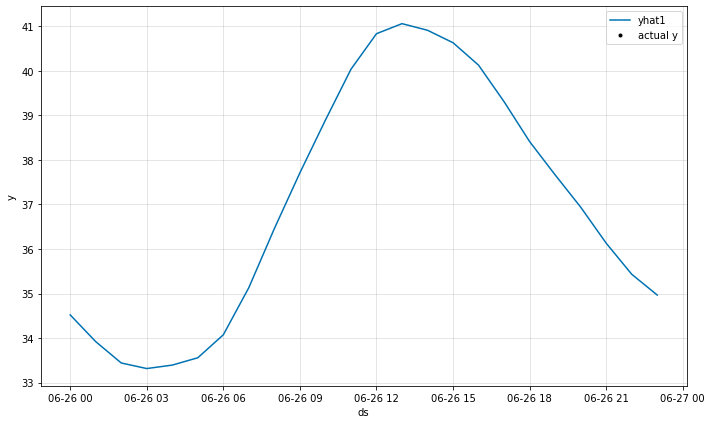

In [178]:
plot1 = model.plot(forecast)

## This model is not perfect and not real time usable since I don't know data is stationary or not So I have not done any hyper-parameter tuning or split dataset and some how temporary finished it, once I gained enough experience and knowledge I will re-take this project.   